In [1]:
# Data Handling & Manipulation
import pandas as pd                                         # for dataframes, CSV/Excel reading, tabular data manipulation
import numpy as np                                          # for numerical operations and array handling
import datetime                                             # for date and time manipulation
from datetime import datetime, timedelta                    # for date arithmetic (e.g., adding days)


# Data Visualisation (Static)
import matplotlib.pyplot as plt                             # for creating static plots
from matplotlib.ticker import FuncFormatter                 # for customising tick labels (e.g., currency, %)
import seaborn as sns                                       # for statistical visualisation (heatmaps, distplots, etc.)

# Data Visualisation (Interactive)
import plotly.express as px                                 # for quick and interactive visualisation
import plotly.graph_objects as go                           # for custom interactive plots
from plotly.subplots import make_subplots                   # for interactive subplots

# Data Quality & Missing Value Visualisation
import missingno as msno                                    # for visualising missing data patterns

# Statistical Testing & Inference
from statsmodels.stats.proportion import proportions_ztest  # for comparing proportions (e.g., late vs. on-time)
from scipy.stats import (
    normaltest,                                             # for checking normality
    chi2_contingency,                                       # for categorical association
    mannwhitneyu,                                           # for non-parametric testing
    ttest_ind,                                              # for independent sample t-test
    f_oneway,                                               # for one-way ANOVA
    kruskal,                                                # for Kruskal-Wallis test
    kstest,                                                 # for Kolmogorov-Smirnov test
    spearmanr,                                              # for Spearman correlation
    pointbiserialr                                          # for point-biserial correlation (binary vs. continuous)
)
import statsmodels.api as sm                                # for advanced statistical modelling and diagnostics
import statsmodels.formula.api as smf                       # for formula-based statistical models
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # for post-hoc tests after ANOVA

# System & Settings
import os                                                   # for file handling and directory operations
import warnings                                             # to suppress or manage warning messages
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)                 # display full content in cells (useful for text data)

# Machine Learning & Model Evaluation
import joblib                                               # for saving and loading ML models
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    average_precision_score, precision_recall_fscore_support,
    confusion_matrix, PrecisionRecallDisplay, make_scorer, roc_auc_score,
    classification_report, roc_curve, auc, fbeta_score
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier           # for KNN classifier (added since it's in your benchmark)
from sklearn.tree import DecisionTreeClassifier              # for Decision Tree classifier (added since it's in your benchmark)
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from xgboost import XGBClassifier                           # for XGBoost classifier
from lightgbm import LGBMClassifier                         # for LightGBM classifier
from catboost import CatBoostClassifier, Pool               # for CatBoost classifier

In [2]:
# List of date columns for each Olist dataset:
# This dictionary maps each dataset filename to a list of columns that should be parsed as dates.
date_cols = {
    'olist_orders_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_dataset.csv': [
        'shipping_limit_date',
    ],
    'olist_order_reviews_dataset.csv': [
        'review_creation_date',
        'review_answer_timestamp',
    ],
    # The following datasets have NO date columns:
    # 'olist_customers_dataset.csv'
    # 'olist_geolocation_dataset.csv'
    # 'olist_order_payments_dataset.csv'
    # 'olist_products_dataset.csv'
    # 'olist_sellers_dataset.csv'
    # 'product_category_name_translation.csv'
    'master_olist_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
        'shipping_limit_date',
        'review_creation_date',
        'review_answer_timestamp',
    ],
}

def read_olist_csv(path):
    """
    Reads an Olist CSV and parses dates for the correct columns.
    Args:
        path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe with date columns parsed as datetime.
    """
    # Extract just the filename, e.g., 'olist_orders_dataset.csv':
    filename = os.path.basename(path)
    # Get the correct date columns for this file, or an empty list:
    parse_dates = date_cols.get(filename, [])
    # Read the CSV, parsing the specified date columns (if any):
    return pd.read_csv(path, parse_dates=parse_dates)

In [3]:
df = read_olist_csv('../data/cleaned_data/olist_ml_ready_dataset.csv')
df.head()

,purchase_to_approve_hrs,approve_to_estimated_days,approve_to_shipping_limit_days,purchase_hour,purchase_dow,purchase_month,is_weekend,is_brazil_holiday,distance_km,same_state,...,seller_90d_order_count,sum_freight_value,price,total_payment_value,customer_state,seller_state,freight_value,product_category_name_english,payment_types,is_late
0,0.178333,15,4,10,0,10,0,0,18.657513,1,...,42.0,8.72,29.99,38.71,SP,SP,8.72,housewares,"credit_card, voucher",False
1,30.713889,17,4,20,1,7,0,0,861.068703,0,...,58.0,22.76,118.70,141.46,BA,SP,22.76,perfumery,boleto,False
2,0.276111,26,5,8,2,8,0,0,514.560686,0,...,237.0,19.22,159.90,179.12,GO,SP,19.22,auto,credit_card,False
3,0.298056,26,5,19,5,11,1,0,1821.871635,0,...,28.0,27.20,45.00,72.20,RN,MG,27.20,pet_shop,credit_card,False
4,1.030556,12,5,21,1,2,0,0,29.623876,1,...,38.0,8.72,19.90,28.62,SP,SP,8.72,stationery,credit_card,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   purchase_to_approve_hrs                 109933 non-null  float64
 1   approve_to_estimated_days               109933 non-null  int64  
 2   approve_to_shipping_limit_days          109933 non-null  int64  
 3   purchase_hour                           109933 non-null  int64  
 4   purchase_dow                            109933 non-null  int64  
 5   purchase_month                          109933 non-null  int64  
 6   is_weekend                              109933 non-null  int64  
 7   is_brazil_holiday                       109933 non-null  int64  
 8   distance_km                             109933 non-null  float64
 9   same_state                              109933 non-null  int64  
 10  freight_ratio                           1099

## Data Checking

Change the target variable (`is_late`) to an int for the model training

In [5]:
df['is_late'] = df['is_late'].astype(int)

Based on the check after Feature Engineering, all of the numerical features have non-normal distributions, and most are skewed. However, the outliers are all valid real data, so instead of removing them, we'll handle them using RobustScaler

Categorical features descriptive statistics:

In [6]:
df.describe(include=['O'])

,customer_state,seller_state,product_category_name_english,payment_types
count,109933,109933,109933,109933
unique,27,22,74,6
top,SP,SP,bed_bath_table,credit_card
freq,46345,78416,10929,81901


# Get list of features that were dropped

In [7]:
df_master = read_olist_csv('../data/cleaned_data/master_olist_dataset.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109933 non-null  object        
 1   customer_id                    109933 non-null  object        
 2   order_status                   109933 non-null  object        
 3   order_purchase_timestamp       109933 non-null  datetime64[ns]
 4   order_approved_at              109933 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109933 non-null  datetime64[ns]
 6   order_delivered_customer_date  109933 non-null  datetime64[ns]
 7   order_estimated_delivery_date  109933 non-null  datetime64[ns]
 8   customer_unique_id             109933 non-null  object        
 9   customer_zip_code_prefix       109933 non-null  int64         
 10  customer_city                  109933 non-null  object        
 11  

In [8]:
# Get columns in df_master that are not in df
dropped_columns = set(df_master.columns) - set(df.columns)

# Convert to a list and sort for better readability
dropped_columns_list = sorted(list(dropped_columns))

# Create a DataFrame to display the dropped columns in a table format
dropped_columns_df = pd.DataFrame({
    'Dropped Column': dropped_columns_list
})

# Display the dropped columns
dropped_columns_df

,Dropped Column
0,customer_city
1,customer_id
2,customer_unique_id
3,customer_zip_code_prefix
4,has_review
5,max_installments
6,n_payments
7,order_approved_at
8,order_delivered_carrier_date
9,order_delivered_customer_date


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   purchase_to_approve_hrs                 109933 non-null  float64
 1   approve_to_estimated_days               109933 non-null  int64  
 2   approve_to_shipping_limit_days          109933 non-null  int64  
 3   purchase_hour                           109933 non-null  int64  
 4   purchase_dow                            109933 non-null  int64  
 5   purchase_month                          109933 non-null  int64  
 6   is_weekend                              109933 non-null  int64  
 7   is_brazil_holiday                       109933 non-null  int64  
 8   distance_km                             109933 non-null  float64
 9   same_state                              109933 non-null  int64  
 10  freight_ratio                           1099

# Comparing F2-score & PR-AUC

In [10]:
TEST_SIZE = 0.2
RANDOM_STATE = 21

## Data Splitting

In [11]:
# Separate X and y
X = df.drop(columns=['is_late'])
y = df['is_late']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    stratify=y, 
    random_state=RANDOM_STATE
)

print(y_train.mean(), y_test.mean())  # Quick check: class balance is preserved

0.07920769563141018 0.0792286351025606


In [13]:
# Define column groups
num_cols = [
    'purchase_to_approve_hrs', 'approve_to_estimated_days', 'approve_to_shipping_limit_days',
    'distance_km', 'freight_ratio', 'seller_dispatch_hub', 'seller_30d_order_count', 'seller_30d_dispatch_late_rate_raw',
    'seller_30d_dispatch_late_rate_smoothed', 'seller_90d_order_count', 'seller_90d_dispatch_late_rate_raw',
    'seller_90d_dispatch_late_rate_smoothed', 'sum_freight_value', 'price',
    'total_payment_value', 'freight_value'
]
bin_cols = [
    'is_weekend', 'is_brazil_holiday', 'same_state', 'customer_is_remote'
]
cat_cols = [
    'customer_state', 'seller_state', 'product_category_name_english', 'payment_types',
    'purchase_hour', 'purchase_dow', 'purchase_month'
]

In [14]:
# Preprocessing pipeline for sklearn models (OHE + scaler)
preprocess_ohe = ColumnTransformer([
    ("num", RobustScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', handle_unknown="ignore"), cat_cols),
    ("bin", "passthrough", bin_cols)
])

# 5. For CatBoost: no OHE (native handling)
preprocess_passthrough = "passthrough"

In [15]:
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

models = {
    "Dummy":         (DummyClassifier(strategy="most_frequent"), preprocess_passthrough),
    "LogReg":        (LogisticRegression(max_iter=300, class_weight="balanced", solver="lbfgs", random_state=RANDOM_STATE), preprocess_ohe),
    "DecisionTree":  (DecisionTreeClassifier(max_depth=None, min_samples_leaf=10, class_weight="balanced", random_state=RANDOM_STATE), preprocess_ohe),
    "RandomForest":  (RandomForestClassifier(n_estimators=300, max_depth=None, class_weight="balanced", n_jobs=-1, random_state=RANDOM_STATE), preprocess_ohe),
    "XGBoost":      (XGBClassifier(
                        n_estimators=300,
                        learning_rate=0.1,
                        scale_pos_weight=pos_weight,
                        use_label_encoder=False,         
                        eval_metric='logloss',
                        n_jobs=-1,
                        random_state=RANDOM_STATE
                     ),     preprocess_ohe),
    "LightGBM":      (LGBMClassifier(n_estimators=300, learning_rate=0.1, class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1), preprocess_ohe),
    "CatBoost":      (CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, random_state=RANDOM_STATE, verbose=0, cat_features=cat_cols, allow_writing_files=False), preprocess_passthrough)
}

In [16]:
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    confusion_matrix, classification_report, PrecisionRecallDisplay
)

In [17]:
# --- rebuild the pipeline exactly as in the benchmark -------------
lgbm_pipe = Pipeline([
    ("preprocess", preprocess_ohe),
    ("model", LGBMClassifier(
        n_estimators=300,
        learning_rate=0.1,
        class_weight="balanced",
        n_jobs=-1,
        random_state=RANDOM_STATE
    ))
])

# --- fit on full training set -------------------------------------
lgbm_pipe.fit(X_train, y_train)

# ---  get probabilities and default predictions --------------------
y_prob = lgbm_pipe.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.50).astype(int)                 # default 0.5 cut-off

# --- core metrics --------------------------------------------------
pr_auc  = average_precision_score(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"PR-AUC   : {pr_auc:.3f}")
print(f"ROC-AUC  : {roc_auc:.3f}\n")
print("Classification report (threshold 0.50):")
print(classification_report(y_test, y_pred, digits=3))

# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=["Actual On-time","Actual Late"],
                  columns=["Pred On-time","Pred Late"])
print("\nConfusion matrix:")
display(cm)


[LightGBM] [Info] Number of positive: 6966, number of negative: 80980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4014
[LightGBM] [Info] Number of data points in the train set: 87946, number of used features: 174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
PR-AUC   : 0.404
ROC-AUC  : 0.851

Classification report (threshold 0.50):
              precision    recall  f1-score   support

           0      0.971     0.829     0.895     20245
           1      0.265     0.714     0.386      1742

    accuracy                          0.820     21987
   macro avg      0.618     0.771     0.640     21987
weighted avg      0.915     0.820     0.854     21987


Confusion matrix:


d:\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Pred On-time,Pred Late
Actual On-time,16789,3456
Actual Late,499,1243


Threshold for ≥75% recall: 0.0091
  resulting precision     : 0.0802

Threshold for ≥80% precision: 0.9060
  resulting recall        : 0.0746

Threshold for maximum F1 score: 0.7188
  resulting precision     : 0.4063
  resulting recall        : 0.4466
  resulting F1 score      : 0.4255

Threshold for maximum F2 score: 0.5045
  resulting precision     : 0.2680
  resulting recall        : 0.7113
  resulting F2 score      : 0.5345

Classification report at F-beta optimized threshold:
              precision    recall  f1-score   support

           0      0.971     0.833     0.897     20245
           1      0.268     0.711     0.389      1742

    accuracy                          0.823     21987
   macro avg      0.620     0.772     0.643     21987
weighted avg      0.915     0.823     0.856     21987



,Pred On-time,Pred Late
Actual On-time,16861,3384
Actual Late,503,1239


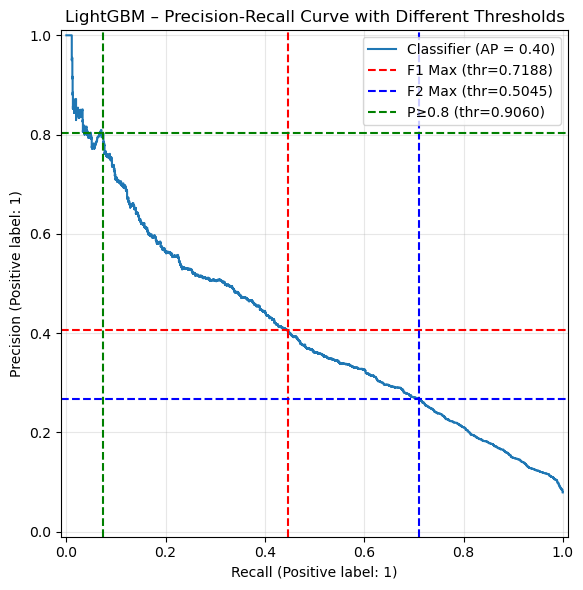

In [18]:
# Find a threshold that balances precision and recall for LightGBM
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Option 1: Find threshold for specific target recall
target_recall = 0.75  # We want to catch 75% of late deliveries
idx = np.where((recalls >= target_recall) & (recalls < 1.0))[0]
if idx.size:
    best_recall_thr = thresholds[idx[0]]
    print(f"Threshold for ≥{target_recall*100:.0f}% recall: {best_recall_thr:.4f}")
    print(f"  resulting precision     : {precisions[idx[0]]:.4f}")
else:
    print(f"Model cannot reach {target_recall*100:.0f}% recall")

# Option 2: Find threshold for good precision (e.g., 80%)
target_precision = 0.80
idx_prec = np.where(precisions >= target_precision)[0]
if idx_prec.size:
    # Get the highest recall that maintains target precision
    max_recall_idx = idx_prec[np.argmax(recalls[idx_prec])]
    best_prec_thr = thresholds[max_recall_idx]
    print(f"\nThreshold for ≥{target_precision*100:.0f}% precision: {best_prec_thr:.4f}")
    print(f"  resulting recall        : {recalls[max_recall_idx]:.4f}")
else:
    print(f"\nModel cannot reach {target_precision*100:.0f}% precision")

# Option 3: F1 score optimization (balance between precision and recall)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_f1_idx = np.argmax(f1_scores)
best_f1_thr = thresholds[best_f1_idx]
print(f"\nThreshold for maximum F1 score: {best_f1_thr:.4f}")
print(f"  resulting precision     : {precisions[best_f1_idx]:.4f}")
print(f"  resulting recall        : {recalls[best_f1_idx]:.4f}")
print(f"  resulting F1 score      : {f1_scores[best_f1_idx]:.4f}")

# Option 4: F-beta optimization that prioritizes recall
beta = 2  # Beta > 1 favors recall over precision (beta=2 weights recall twice as much as precision)
fbeta_scores = (1 + beta**2) * (precisions * recalls) / ((beta**2 * precisions) + recalls + 1e-10)
best_fbeta_idx = np.argmax(fbeta_scores)
best_fbeta_thr = thresholds[best_fbeta_idx]
print(f"\nThreshold for maximum F{beta} score: {best_fbeta_thr:.4f}")
print(f"  resulting precision     : {precisions[best_fbeta_idx]:.4f}")
print(f"  resulting recall        : {recalls[best_fbeta_idx]:.4f}")
print(f"  resulting F{beta} score      : {fbeta_scores[best_fbeta_idx]:.4f}")

# Select F-beta threshold as our chosen threshold
chosen_threshold = best_fbeta_thr

# Build predictions using the chosen threshold
y_pred_balanced = (y_prob >= chosen_threshold).astype(int)

print("\nClassification report at F-beta optimized threshold:")
print(classification_report(y_test, y_pred_balanced, digits=3))

# Display a confusion matrix
cm = confusion_matrix(y_test, y_pred_balanced)
display(pd.DataFrame(
    cm,
    index=["Actual On-time","Actual Late"],
    columns=["Pred On-time","Pred Late"]
))

# Create precision-recall curve visualization
fig, ax = plt.figure(figsize=(10, 6)), plt.gca()
PrecisionRecallDisplay.from_predictions(y_test, y_prob, ax=ax)

# Add vertical and horizontal lines for F1 threshold
plt.axvline(x=recalls[best_f1_idx], color='r', linestyle='--', label=f'F1 Max (thr={best_f1_thr:.4f})')
plt.axhline(y=precisions[best_f1_idx], color='r', linestyle='--')

# Add vertical and horizontal lines for F-beta threshold
plt.axvline(x=recalls[best_fbeta_idx], color='b', linestyle='--', label=f'F{beta} Max (thr={best_fbeta_thr:.4f})')
plt.axhline(y=precisions[best_fbeta_idx], color='b', linestyle='--')

# Add vertical and horizontal lines for 80% precision threshold
plt.axvline(x=recalls[max_recall_idx], color='g', linestyle='--', label=f'P≥{target_precision} (thr={best_prec_thr:.4f})')
plt.axhline(y=precisions[max_recall_idx], color='g', linestyle='--')

# Enhance the plot
plt.title("LightGBM – Precision-Recall Curve with Different Thresholds")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
# --- rebuild the pipeline exactly as in the benchmark -------------
rf_pipe = Pipeline([
    ("preprocess", preprocess_ohe),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight="balanced",
        n_jobs=-1,
        random_state=RANDOM_STATE
    ))
])

# --- fit on full training set -------------------------------------
rf_pipe.fit(X_train, y_train)

# ---  get probabilities and default predictions --------------------
y_prob = rf_pipe.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.50).astype(int)                 # default 0.5 cut-off

# --- core metrics --------------------------------------------------
pr_auc  = average_precision_score(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"PR-AUC   : {pr_auc:.3f}")
print(f"ROC-AUC  : {roc_auc:.3f}\n")
print("Classification report (threshold 0.50):")
print(classification_report(y_test, y_pred, digits=3))

# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=["Actual On-time","Actual Late"],
                  columns=["Pred On-time","Pred Late"])
print("\nConfusion matrix:")
display(cm)


d:\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


PR-AUC   : 0.513
ROC-AUC  : 0.861

Classification report (threshold 0.50):
              precision    recall  f1-score   support

           0      0.934     0.999     0.965     20245
           1      0.948     0.177     0.298      1742

    accuracy                          0.934     21987
   macro avg      0.941     0.588     0.632     21987
weighted avg      0.935     0.934     0.913     21987


Confusion matrix:


,Pred On-time,Pred Late
Actual On-time,20228,17
Actual Late,1434,308


Threshold for ≥75% recall: 0.0067
  resulting precision     : 0.0846

Threshold for ≥80% precision: 0.3867
  resulting recall        : 0.2405

Threshold for maximum F1 score: 0.2033
  resulting precision     : 0.4672
  resulting recall        : 0.4862
  resulting F1 score      : 0.4765

Threshold for maximum F2 score: 0.1233
  resulting precision     : 0.3076
  resulting recall        : 0.6728
  resulting F2 score      : 0.5437

Classification report at F-beta optimized threshold:
              precision    recall  f1-score   support

           0      0.969     0.870     0.917     20245
           1      0.308     0.673     0.422      1742

    accuracy                          0.854     21987
   macro avg      0.638     0.771     0.669     21987
weighted avg      0.916     0.854     0.877     21987



,Pred On-time,Pred Late
Actual On-time,17607,2638
Actual Late,570,1172


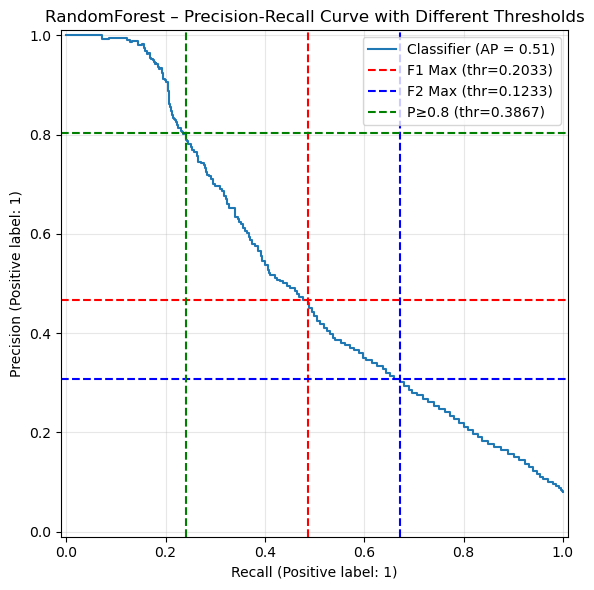

In [20]:
# Find a threshold that balances precision and recall for Random Forest
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Option 1: Find threshold for specific target recall
target_recall = 0.75  # We want to catch 75% of late deliveries
idx = np.where((recalls >= target_recall) & (recalls < 1.0))[0]
if idx.size:
    best_recall_thr = thresholds[idx[0]]
    print(f"Threshold for ≥{target_recall*100:.0f}% recall: {best_recall_thr:.4f}")
    print(f"  resulting precision     : {precisions[idx[0]]:.4f}")
else:
    print(f"Model cannot reach {target_recall*100:.0f}% recall")

# Option 2: Find threshold for good precision (e.g., 80%)
target_precision = 0.80
idx_prec = np.where(precisions >= target_precision)[0]
if idx_prec.size:
    # Get the highest recall that maintains target precision
    max_recall_idx = idx_prec[np.argmax(recalls[idx_prec])]
    best_prec_thr = thresholds[max_recall_idx]
    print(f"\nThreshold for ≥{target_precision*100:.0f}% precision: {best_prec_thr:.4f}")
    print(f"  resulting recall        : {recalls[max_recall_idx]:.4f}")
else:
    print(f"\nModel cannot reach {target_precision*100:.0f}% precision")

# Option 3: F1 score optimization (balance between precision and recall)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_f1_idx = np.argmax(f1_scores)
best_f1_thr = thresholds[best_f1_idx]
print(f"\nThreshold for maximum F1 score: {best_f1_thr:.4f}")
print(f"  resulting precision     : {precisions[best_f1_idx]:.4f}")
print(f"  resulting recall        : {recalls[best_f1_idx]:.4f}")
print(f"  resulting F1 score      : {f1_scores[best_f1_idx]:.4f}")

# Option 4: F-beta optimization that prioritizes recall
beta = 2  # Beta > 1 favors recall over precision (beta=2 weights recall twice as much as precision)
fbeta_scores = (1 + beta**2) * (precisions * recalls) / ((beta**2 * precisions) + recalls + 1e-10)
best_fbeta_idx = np.argmax(fbeta_scores)
best_fbeta_thr = thresholds[best_fbeta_idx]
print(f"\nThreshold for maximum F{beta} score: {best_fbeta_thr:.4f}")
print(f"  resulting precision     : {precisions[best_fbeta_idx]:.4f}")
print(f"  resulting recall        : {recalls[best_fbeta_idx]:.4f}")
print(f"  resulting F{beta} score      : {fbeta_scores[best_fbeta_idx]:.4f}")

# Select F-beta threshold as our chosen threshold
chosen_threshold = best_fbeta_thr

# Build predictions using the chosen threshold
y_pred_balanced = (y_prob >= chosen_threshold).astype(int)

print("\nClassification report at F-beta optimized threshold:")
print(classification_report(y_test, y_pred_balanced, digits=3))

# Display a confusion matrix
cm = confusion_matrix(y_test, y_pred_balanced)
display(pd.DataFrame(
    cm,
    index=["Actual On-time","Actual Late"],
    columns=["Pred On-time","Pred Late"]
))

# Create precision-recall curve visualization
fig, ax = plt.figure(figsize=(10, 6)), plt.gca()
PrecisionRecallDisplay.from_predictions(y_test, y_prob, ax=ax)

# Add vertical and horizontal lines for F1 threshold
plt.axvline(x=recalls[best_f1_idx], color='r', linestyle='--', label=f'F1 Max (thr={best_f1_thr:.4f})')
plt.axhline(y=precisions[best_f1_idx], color='r', linestyle='--')

# Add vertical and horizontal lines for F-beta threshold
plt.axvline(x=recalls[best_fbeta_idx], color='b', linestyle='--', label=f'F{beta} Max (thr={best_fbeta_thr:.4f})')
plt.axhline(y=precisions[best_fbeta_idx], color='b', linestyle='--')

# Add vertical and horizontal lines for 80% precision threshold
plt.axvline(x=recalls[max_recall_idx], color='g', linestyle='--', label=f'P≥{target_precision} (thr={best_prec_thr:.4f})')
plt.axhline(y=precisions[max_recall_idx], color='g', linestyle='--')

# Enhance the plot
plt.title("RandomForest – Precision-Recall Curve with Different Thresholds")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()